<a href="https://colab.research.google.com/github/MIHLALIMSUTHU/Data_science_projects/blob/main/HR_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/Datasets/HumanResources.csv')

In [3]:
df.head()

,employee_id,first_name,last_name,gender,state,city,hiredate,department,job_title,education_level,salary,performance_rating,overtime,birthdate,termdate
0,00-95822412,Danielle,Johnson,Female,New York,Buffalo,2016-04-16,Customer Service,Help Desk Technician,High School,81552,Good,No,1980-10-11,2021-07-05
1,00-42868828,John,Taylor,Male,North Carolina,Charlotte,2017-02-09,IT,System Administrator,Bachelor,107520,Good,No,1988-05-20,2019-06-14
2,00-83197857,Erica,Mcclain,Male,New York,New York City,2016-02-03,Operations,Logistics Coordinator,Bachelor,61104,Good,Yes,1995-01-15,2021-03-06
3,00-13999315,Brittany,Johnson,Male,New York,Rochester,2016-02-06,Operations,Inventory Specialist,Bachelor,73770,Good,No,1980-12-15,2018-11-06
4,00-90801586,Jeffery,Wagner,Female,New York,Rochester,2015-01-11,Operations,Operations Analyst,Bachelor,55581,Satisfactory,No,1985-12-04,2017-11-29


Which department has the highest employee churn and why?

In [4]:
#calculating sum of terminations by department
department_terminations = df.groupby('department')['termdate'].count().sort_values(ascending=False)
print('Number of Terminations by Department:')
print(department_terminations)

Number of Terminations by Department:
department
Operations          301
Sales               208
Customer Service    190
IT                  142
Marketing            75
Finance              64
HR                   20
Name: termdate, dtype: int64


In [5]:
#calculating total number of employees by department
department_total_employees = df.groupby('department')['employee_id'].count()

In [6]:
#calculation of churn rate by department
churn_rate_by_department = (department_terminations / department_total_employees * 100).sort_values(ascending=False)
print('Churn rate by department (%)')
print(churn_rate_by_department)


#conclusions drawn:
# High pressure, work-life balance, management style, and lack of
# professional development might be reasons leading to such a churn rate.

Churn rate by department (%)
department
Finance             14.159292
HR                  11.627907
Customer Service    11.356844
Sales               11.335150
Operations          11.074319
Marketing           10.445682
IT                  10.274964
dtype: float64


/tmp/ipython-input-3208406753.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_by_department.index, y=churn_rate_by_department.values, palette='viridis')


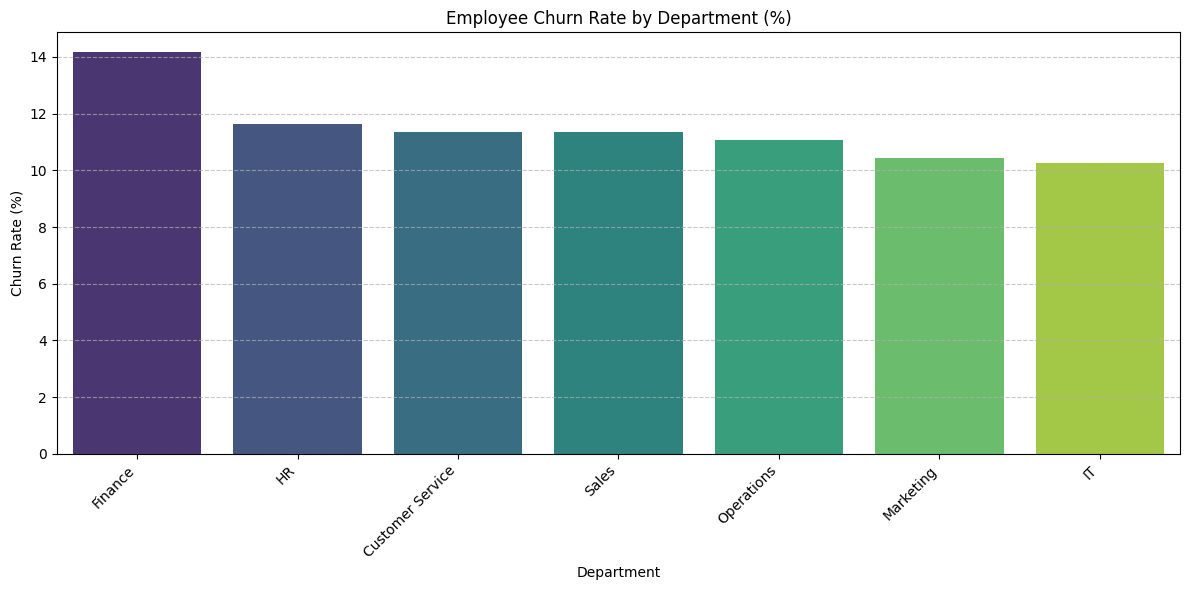

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart for churn rate by department
plt.figure(figsize=(12, 6))
sns.barplot(x=churn_rate_by_department.index, y=churn_rate_by_department.values, palette='viridis')
plt.title('Employee Churn Rate by Department (%)')
plt.xlabel('Department')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Do specific cities or locations drive more attrition?

In [8]:
#Filter terminated employees first
terminated = df[df['termdate'].notna()]

In [9]:
#Attrition count by city
Attrition_by_city = terminated.groupby('city')['employee_id'].count()

In [10]:
#total number of employees by city.
Employees_by_city = df.groupby('city')['employee_id'].count()

In [11]:
#Churn rate by cities.
Churn_rate_by_city = (Attrition_by_city / Employees_by_city * 100).sort_values(ascending=False)
print('Churn rate by city (%)')
print(Churn_rate_by_city)

Churn rate by city (%)
city
Chicago           15.533981
Grand Rapids      15.015974
Miami             13.157895
Aurora            12.048193
Buffalo           11.798561
Orlando           11.764706
Rochester         11.714286
Richmond          11.666667
Charlotte         11.486486
Philadelphia      10.975610
New York City     10.887290
Pittsburgh        10.483871
Detroit            9.890110
Warren             9.698997
Columbus           9.523810
Norfolk            9.375000
Cleveland          9.302326
Greensboro         9.154930
Naperville         9.090909
Virginia Beach     8.928571
Allentown          8.843537
Raleigh            7.857143
Cincinnati         5.940594
Tampa                   NaN
Name: employee_id, dtype: float64


/tmp/ipython-input-3855397722.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


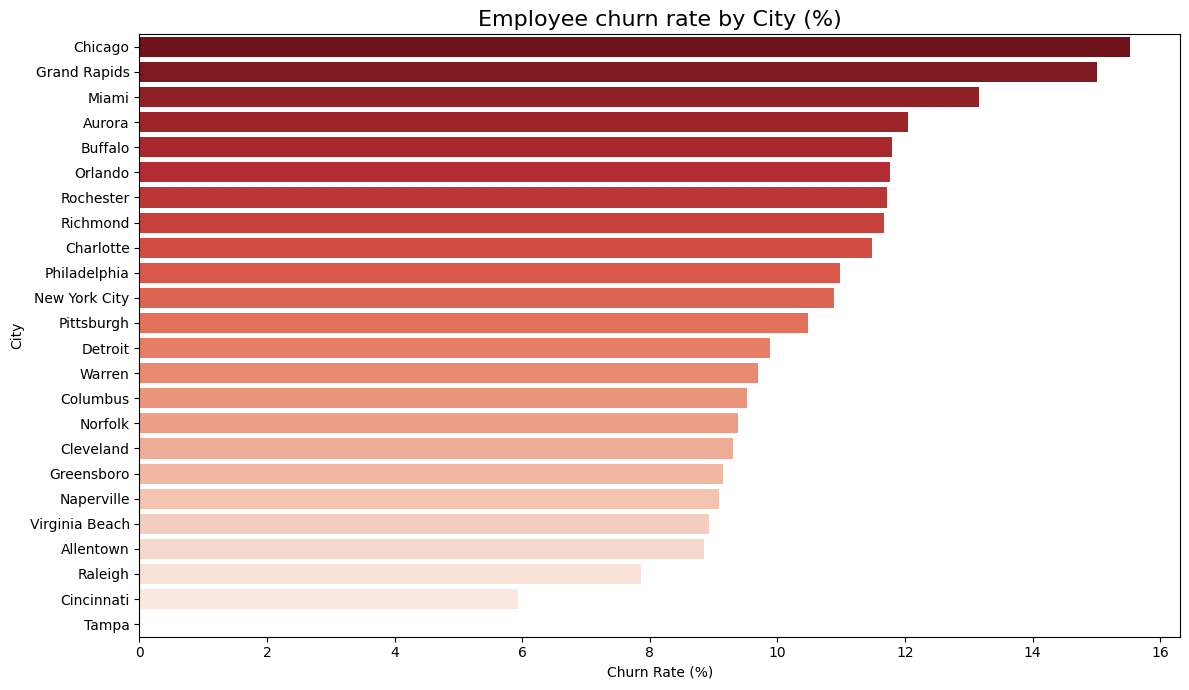

In [12]:
#Visual representation of churn rate by cities.
plt.figure(figsize=(12, 7))
sns.barplot(
    x=Churn_rate_by_city.values,
    y=Churn_rate_by_city.index,
    palette='Reds_r'
)

plt.title('Employee churn rate by City (%)', fontsize=16)
plt.xlabel('Churn Rate (%)')
plt.ylabel('City')
plt.tight_layout()
plt.show()

Are we over-relying on operations and sales headcount relative to business value?

In [13]:
df.columns

Index(['employee_id', 'first_name', 'last_name', 'gender', 'state', 'city',
       'hiredate', 'department', 'job_title', 'education_level', 'salary',
       'performance_rating', 'overtime', 'birthdate', 'termdate'],
      dtype='object')

In [14]:
#Head count by department
dept_count = df.groupby('department')['employee_id'].count().sort_values(ascending=False)
print(dept_count)

department
Operations          2718
Sales               1835
Customer Service    1673
IT                  1382
Marketing            718
Finance              452
HR                   172
Name: employee_id, dtype: int64


/tmp/ipython-input-2699318581.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_count.values, y=dept_count.index, palette= 'Blues_r')


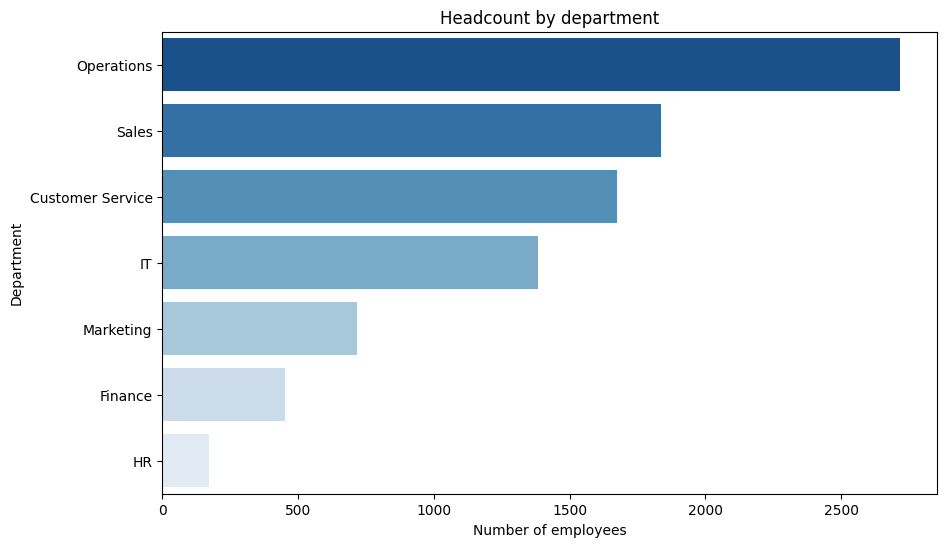

In [15]:
#Visualize
plt.figure(figsize=(10, 6))
sns.barplot(x=dept_count.values, y=dept_count.index, palette= 'Blues_r')
plt.title('Headcount by department')
plt.xlabel('Number of employees')
plt.ylabel('Department')
plt.show()

# The headcount is heavily concentrated in operations and sales. This means any
# churn or performance issues in these departments will have a significant
# impact on the business compared to smaller departments like HR or Finance.
# Such departments should be prioritized in workforce planning and retension
# strategies.

Salary and compensation fairness.

In [16]:
df.columns

Index(['employee_id', 'first_name', 'last_name', 'gender', 'state', 'city',
       'hiredate', 'department', 'job_title', 'education_level', 'salary',
       'performance_rating', 'overtime', 'birthdate', 'termdate'],
      dtype='object')

gender
Male      72517.338679
Female    69127.251868
Name: salary, dtype: float64


/tmp/ipython-input-4041395138.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='salary', data=df, palette= 'coolwarm')


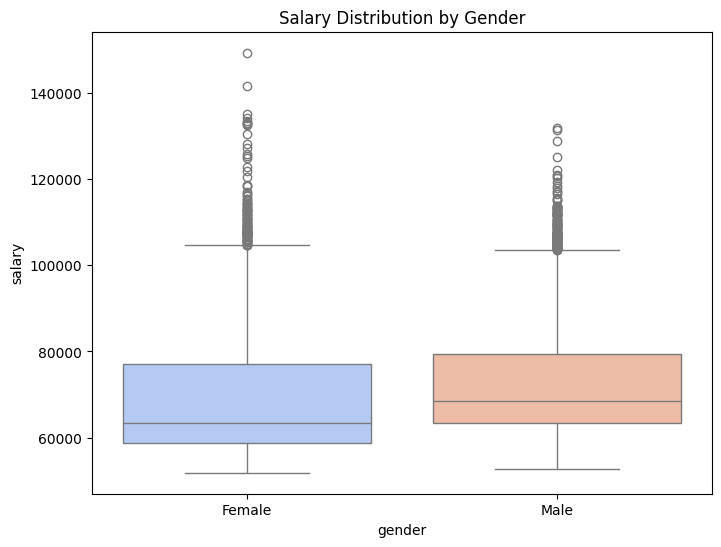

In [17]:
#Salary by gender
salary_by_gender = df.groupby('gender')['salary'].mean().sort_values(ascending=False)
print(salary_by_gender)


#Visualize
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='salary', data=df, palette= 'coolwarm')
plt.title('Salary Distribution by Gender')
plt.show()

# A compensation fairness review reveals potential equity concerns within the
# organisation. While overall salary distribution shows men earning more tham
# women on average, deeper analysis indicates that disparities are concentrated
# within specific departments rather than the whole organization. Education
# appears to correlate positively with salary; however,certain overlaps suggest
# inconsistent reward structures. These findings highlight the need for review
# in compensation policy and monitoring of gender inequality. %% Salary by
# education

In [18]:
#Salary by education
salary_by_education = df.groupby('education_level')['salary'].mean().sort_values(ascending=False)
print(salary_by_education)

education_level
PhD            86033.196653
Master         82574.412146
Bachelor       69918.971207
High School    62144.286971
Name: salary, dtype: float64


job_title
Finance Manager             125143.000000
IT Manager                  113906.821429
Sales Manager               103795.500000
Operations Manager           96937.160714
Marketing Manager            95955.793103
Software Developer           93414.023923
Sales Consultant             86075.500000
Financial Analyst            85664.012422
System Administrator         85466.807143
Customer Service Manager     84782.662162
Name: salary, dtype: float64


/tmp/ipython-input-2183520370.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=salary_by_role.values, y=salary_by_role.index, palette= 'Greens_r')


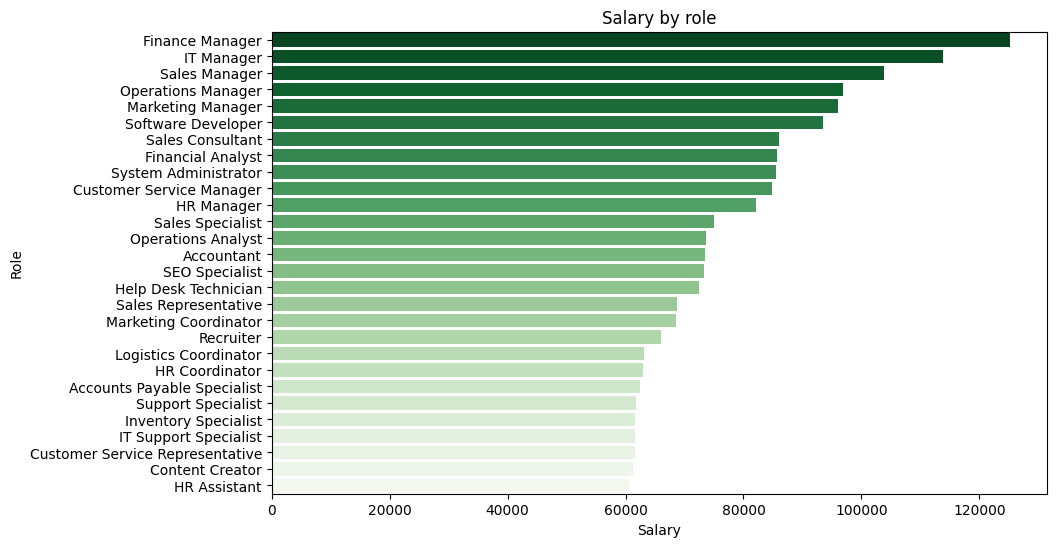

In [19]:
salary_by_role = df.groupby('job_title')['salary'].mean().sort_values(ascending=False)
print(salary_by_role.head(10))

#Visualize
plt.figure(figsize=(10, 6))
sns.barplot(x=salary_by_role.values, y=salary_by_role.index, palette= 'Greens_r')
plt.title('Salary by role')
plt.xlabel('Salary')
plt.ylabel('Role')
plt.show()

Workforce Age and Succession Risk

In [20]:
df.columns

Index(['employee_id', 'first_name', 'last_name', 'gender', 'state', 'city',
       'hiredate', 'department', 'job_title', 'education_level', 'salary',
       'performance_rating', 'overtime', 'birthdate', 'termdate'],
      dtype='object')

In [21]:
df['birthdate'] = pd.to_datetime(df['birthdate'])
df['age'] = (pd.to_datetime('today').year - df['birthdate'].dt.year)
df.groupby('age')['employee_id'].count()

,employee_id
age,
21,10
22,184
23,188
24,178
25,168
26,192
27,203
28,209
29,205


In [22]:
# Which departments are at a retirement risk(With mostly older straff)? Which
# departments have stability and experience gaps(departments with mostly young
# staff)? %% [markdown]
df.groupby('department')['age'].mean().sort_values(ascending=False)

,age
department,
Sales,42.755858
Finance,42.522124
Marketing,41.832869
Customer Service,41.746563
IT,41.380608
HR,41.319767
Operations,41.198675


In [23]:
df.groupby('department')['age'].agg(['mean', 'median', 'std', 'min', 'max'])

,mean,median,std,min,max
department,,,,,
Customer Service,41.746563,42.0,11.242662,21,66
Finance,42.522124,42.0,11.589120,22,66
HR,41.319767,40.0,11.409295,22,65
IT,41.380608,41.0,11.318693,21,66
Marketing,41.832869,42.0,11.195109,21,66
Operations,41.198675,41.0,11.448734,21,66
Sales,42.755858,42.0,11.658037,21,66


In [24]:
#Age bands
df['age_band'] = pd.cut(df['age'], bins=[0, 25, 35, 45, 55, 100], labels=['<25', '25-34', '35-44', '45-54', '55+' ])
df.groupby(['department', 'age_band'])['employee_id'].count().unstack()

/tmp/ipython-input-1210351248.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['department', 'age_band'])['employee_id'].count().unstack()


age_band,<25,25-34,35-44,45-54,55+
department,,,,,
Customer Service,127,398,545,397,206
Finance,32,106,136,111,67
HR,14,45,50,44,19
IT,125,320,436,344,157
Marketing,50,180,211,197,80
Operations,253,678,819,647,321
Sales,127,419,554,442,293


In [25]:
#Attrition rate by age band
total_employees_by_age_band = df.groupby('age_band')['employee_id'].count()
terminated_employees_per_age_band = df[df['termdate'].notna()].groupby('age_band')['employee_id'].count()
attrition_rate_by_age_band = (terminated_employees_per_age_band / total_employees_by_age_band * 100).sort_values(ascending=False)

print('Attrition Rate by Age Band (%):')
print(attrition_rate_by_age_band)
#
#Attrition rate by department + age band
term_emp_per_dept_age_band = df[df['termdate'].notna()].groupby(['department', 'age_band'])['employee_id'].count()


Attrition Rate by Age Band (%):
age_band
<25      12.362637
55+      11.811024
45-54    11.044913
25-34    10.950606
35-44    10.868775
Name: employee_id, dtype: float64


/tmp/ipython-input-2741214567.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_employees_by_age_band = df.groupby('age_band')['employee_id'].count()
/tmp/ipython-input-2741214567.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  terminated_employees_per_age_band = df[df['termdate'].notna()].groupby('age_band')['employee_id'].count()
/tmp/ipython-input-2741214567.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warnin

In [26]:
# Calculate total employees per age band
total_employees_by_age_band = df.groupby('age_band')['employee_id'].count()

# Calculate terminated employees per age band
terminated_by_age_band = df[df['termdate'].notna()].groupby('age_band')['employee_id'].count()

# Calculate attrition rate by age band
attrition_rate_by_age_band = (terminated_by_age_band / total_employees_by_age_band * 100).sort_values(ascending=False)

print('Attrition Rate by Age Band (%):')
print(attrition_rate_by_age_band)


Attrition Rate by Age Band (%):
age_band
<25      12.362637
55+      11.811024
45-54    11.044913
25-34    10.950606
35-44    10.868775
Name: employee_id, dtype: float64


/tmp/ipython-input-3139122099.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_employees_by_age_band = df.groupby('age_band')['employee_id'].count()
/tmp/ipython-input-3139122099.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  terminated_by_age_band = df[df['termdate'].notna()].groupby('age_band')['employee_id'].count()


### Histogram of Employee Age Distribution

/tmp/ipython-input-1815243739.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['age'], bins=20, kde=True, palette='viridis')


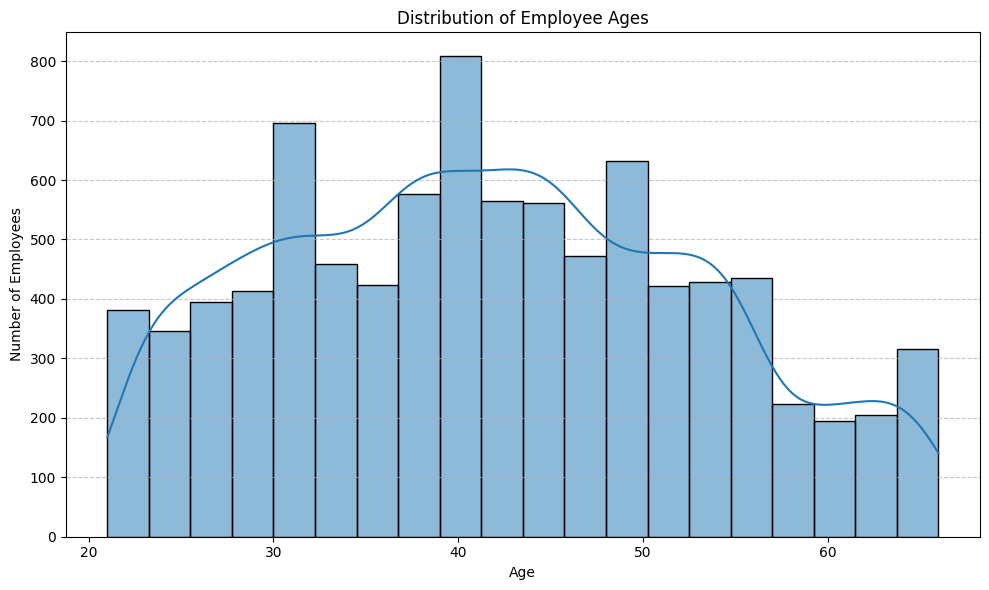

In [27]:
#Visualize attrition rate by age band

plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, palette='viridis')
plt.title('Distribution of Employee Ages')
plt.xlabel('Age')
plt.ylabel('Number of Employees')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Hiring stratergy- are we recruiting effectively?

In [28]:
df.head()

,employee_id,first_name,last_name,gender,state,city,hiredate,department,job_title,education_level,salary,performance_rating,overtime,birthdate,termdate,age,age_band
0,00-95822412,Danielle,Johnson,Female,New York,Buffalo,2016-04-16,Customer Service,Help Desk Technician,High School,81552,Good,No,1980-10-11,2021-07-05,46,45-54
1,00-42868828,John,Taylor,Male,North Carolina,Charlotte,2017-02-09,IT,System Administrator,Bachelor,107520,Good,No,1988-05-20,2019-06-14,38,35-44
2,00-83197857,Erica,Mcclain,Male,New York,New York City,2016-02-03,Operations,Logistics Coordinator,Bachelor,61104,Good,Yes,1995-01-15,2021-03-06,31,25-34
3,00-13999315,Brittany,Johnson,Male,New York,Rochester,2016-02-06,Operations,Inventory Specialist,Bachelor,73770,Good,No,1980-12-15,2018-11-06,46,45-54
4,00-90801586,Jeffery,Wagner,Female,New York,Rochester,2015-01-11,Operations,Operations Analyst,Bachelor,55581,Satisfactory,No,1985-12-04,2017-11-29,41,35-44


In [30]:
df.columns

Index(['employee_id', 'first_name', 'last_name', 'gender', 'state', 'city',
       'hiredate', 'department', 'job_title', 'education_level', 'salary',
       'performance_rating', 'overtime', 'birthdate', 'termdate', 'age',
       'age_band'],
      dtype='object')

### Hiring Trends by Department and Year

In [32]:
# Calculate hiring trends by department and year
hire_trends_dept = df.groupby(['hire_year', 'department'])['employee_id'].count().unstack()

print('Hiring Trends by Department and Year:')
print(hire_trends_dept)

Hiring Trends by Department and Year:
department  Customer Service  Finance  HR   IT  Marketing  Operations  Sales
hire_year                                                                   
2015                      83       16   8   86         31         149     99
2016                     132       51  11  123         55         214    143
2017                     295       67  29  231        134         422    328
2018                     146       46  17  112         62         246    173
2019                     159       40  20  130         70         287    196
2020                     171       54  16  146         79         313    189
2021                      71       22   3   76         37         133     80
2022                     222       50  16  151         79         311    213
2023                     240       58  23  189        100         390    255
2024                     154       48  29  138         71         253    159


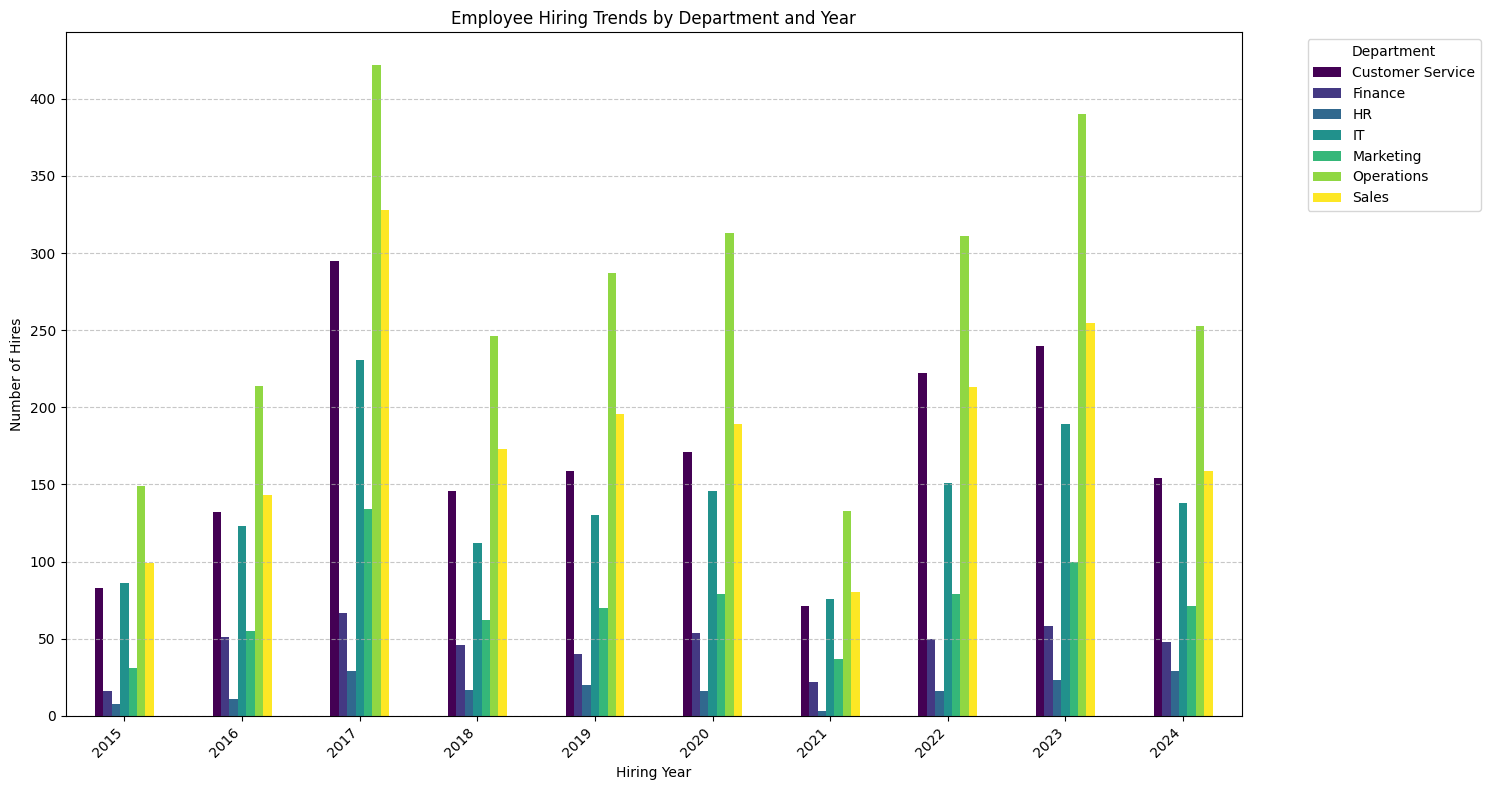

In [33]:
# Visualize hiring trends by department
hire_trends_dept.plot(kind='bar', figsize=(15, 8), colormap='viridis')
plt.title('Employee Hiring Trends by Department and Year')
plt.xlabel('Hiring Year')
plt.ylabel('Number of Hires')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Hiring Trends by Year

In [31]:
# Extract hiring year from 'hiredate'
df['hire_year'] = pd.to_datetime(df['hiredate']).dt.year

# Count hires by year
hire_trends = df.groupby('hire_year')['employee_id'].count().reset_index()
hire_trends.columns = ['hire_year', 'num_hires']

print('Hiring Trends by Year:')
print(hire_trends)

Hiring Trends by Year:
   hire_year  num_hires
0       2015        472
1       2016        729
2       2017       1506
3       2018        802
4       2019        902
5       2020        968
6       2021        422
7       2022       1042
8       2023       1255
9       2024        852


/tmp/ipython-input-3169551824.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hire_year', y='num_hires', data=hire_trends, palette='Blues_d')


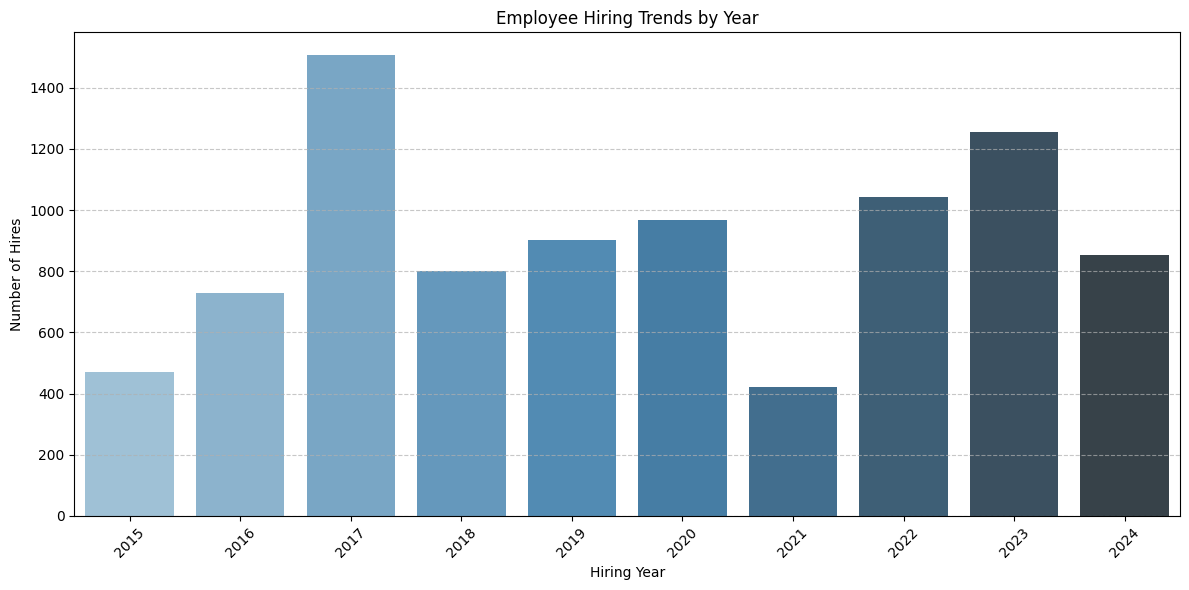

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(x='hire_year', y='num_hires', data=hire_trends, palette='Blues_d')
plt.title('Employee Hiring Trends by Year')
plt.xlabel('Hiring Year')
plt.ylabel('Number of Hires')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()